## Portfolio Management - Mean-Variance Optimization (MVO)

Portfolio management involves creating and managing a diverse set of assets, such as stocks, bonds, and cash, to align with an investor's long-term financial objectives and risk tolerance. This process involves
* Investment Selection
* Asset Allocation
* Risk Management
* Performance Monitoring

There are different stratergies investors follow to find the optimal allocation of assets that maximizes the return while minimizing the risk. This is done by considering investor's financial goals of return and risk. By **diversifying** the assets across various investment avenues helps achieve an optimal balance of risk and reward.

There are several mathematical models that are used in this optimization problem. In this notebook we use the following model,

**1. Mean-Variance Optimization (MVO)**

Developed by Harry Markowitz, this model seeks to construct a portfolio that maximizes expected return for a given level of risk, or minimizes risk for a given level of expected return.
It uses the mean (expected return) and variance (risk) of asset returns to find the optimal portfolio.


Shortcomes of MVO method

* Assumes asset returns are normal, which would not be the case in real life.
* Can generate unintuitive portfolios.
* The output (i.e. asset allocation) is highly sensitive to small changes in the inputs, making it difficult to come up with reasonable estimates for expected returns.
Efficient portfolios that are highly concentrated in a subset of asset classes.
MVO is not reflective of unique investment views.




## Issues of MVO model


In [ ]:
!pip install pypfopt

ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt


In [ ]:
#pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from datetime import datetime, timedelta
#from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting


In [ ]:
# input = past n years data
def fetch_past_data(tickers, n):
  # to get previous n years of data
  end_date = datetime.today()
  start_date = end_date - timedelta(days = n*365)
  data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
  return data

In [ ]:
# Define tickers and time period
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2018-01-01'
#end_date = '2023-01-01'

# Download data
data = fetch_past_data(tickers, 5)
returns = data.pct_change().dropna()


[*********************100%***********************]  5 of 5 completed


In [ ]:
# Calculate annualized expected returns and covariance matrix
expected_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

risk_free_rate = 0.03  # Risk-free rate for Sharpe ratio calculation

In [ ]:

# Function to calculate portfolio performance
def portfolio_performance(weights, expected_returns, cov_matrix):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Objective function: Minimize portfolio volatility
def min_volatility(weights):
    return portfolio_performance(weights, expected_returns, cov_matrix)[1]

# Constraints and bounds
num_assets = len(tickers)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights sum to 1
bounds = tuple((0, 1) for _ in range(num_assets))  # No short selling

# Optimize for minimum volatility
initial_weights = np.array([1. / num_assets] * num_assets)  # Initial equal weights
result = minimize(min_volatility, initial_weights, bounds=bounds, constraints=constraints)
print(result)

# Results
min_vol_weights = result.x
min_vol_return, min_vol_volatility = portfolio_performance(min_vol_weights, expected_returns, cov_matrix)

print("Minimum Volatility Portfolio:")
print(f"Weights: {min_vol_weights}")
print(f"Expected Return: {min_vol_return:.2f}")
print(f"Volatility (Risk): {min_vol_volatility:.2f}")
print(f"Sharpe Ratio: {(min_vol_return-risk_free_rate)/min_vol_volatility:.2f}")




 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.2819085991840349
       x: [ 3.254e-01  1.253e-01  2.378e-01  3.115e-01  1.706e-17]
     nit: 8
     jac: [ 2.822e-01  2.819e-01  2.817e-01  2.817e-01  3.389e-01]
    nfev: 48
    njev: 8
Minimum Volatility Portfolio:
Weights: [3.25387786e-01 1.25259019e-01 2.37848724e-01 3.11504470e-01
 1.70626317e-17]
Expected Return: 0.28
Volatility (Risk): 0.28
Sharpe Ratio: 0.88


In [5]:
Weights=[3.25387786e-01, 1.25259019e-01, 2.37848724e-01, 3.11504470e-01, 1.70626317e-17]
np.round(Weights,2)

array([0.33, 0.13, 0.24, 0.31, 0.  ])

In [ ]:
# Plot bar graph for the weights
def plot_weights(weights, title):
  plt.figure(figsize=(8, 6))
  bars = plt.bar(tickers, weights, color='skyblue')

  # Add weight labels on top of each bar
  for bar, weight in zip(bars, weights):
    plt.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height(),
                 f'{weight:.2f}',  # Format weights to 2 decimal places
                 ha='center',
                 va='bottom',
                 fontsize=10)

  # Add labels and title
  plt.xlabel('Asset Tickers')
  plt.ylabel('Weights')
  plt.title(title)

  # Show the bar plot
  plt.show()

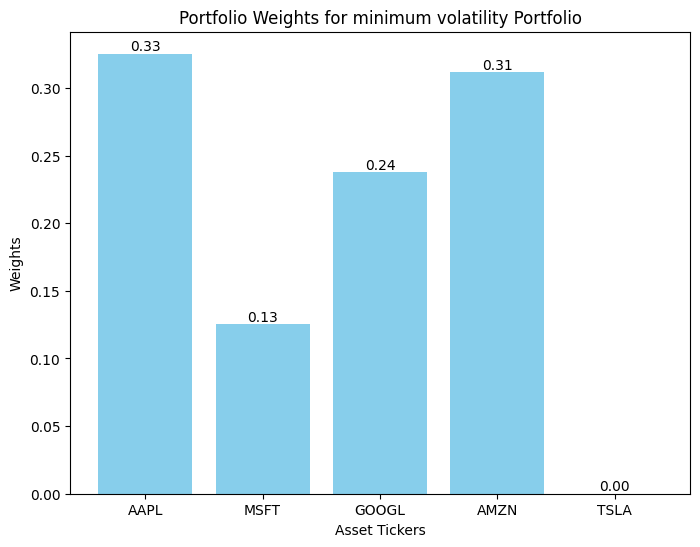

In [ ]:
 plot_weights(min_vol_weights, 'Portfolio Weights for minimum volatility Portfolio')

In [ ]:
# Optimize for maximum Sharpe ratio
def neg_sharpe_ratio(weights):
    port_return, port_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    return -(port_return - risk_free_rate) / port_volatility  # Negative Sharpe ratio


# Constraints and bounds
num_assets = len(tickers)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights sum to 1
bounds = tuple((0, 1) for _ in range(num_assets))  # No short selling

initial_weights = np.array([1. / num_assets] * num_assets)  # Initial equal weights

result_sharpe = minimize(neg_sharpe_ratio, initial_weights, bounds=bounds, constraints=constraints)

# Results
max_sharpe_weights = result_sharpe.x
max_sharpe_return, max_sharpe_volatility = portfolio_performance(max_sharpe_weights, expected_returns, cov_matrix)
max_sharpe_ratio = (max_sharpe_return - risk_free_rate) / max_sharpe_volatility

print("\nMaximum Sharpe Ratio Portfolio:")
print(f"Weights: {max_sharpe_weights}")
print(f"Expected Return: {max_sharpe_return:.2f}")
print(f"Volatility (Risk): {max_sharpe_volatility:.2f}")
print(f"Sharpe Ratio: {max_sharpe_ratio:.2f}")




Maximum Sharpe Ratio Portfolio:
Weights: [4.24862177e-01 2.66713734e-17 1.20167692e-01 0.00000000e+00
 4.54970131e-01]
Expected Return: 0.52
Volatility (Risk): 0.41
Sharpe Ratio: 1.19


In [4]:
import numpy as np
Weights=[4.24862177e-01,  2.66713734e-17, 1.20167692e-01, 0.00000000e+00,4.54970131e-01]
np.round(Weights, 2)

array([0.42, 0.  , 0.12, 0.  , 0.45])

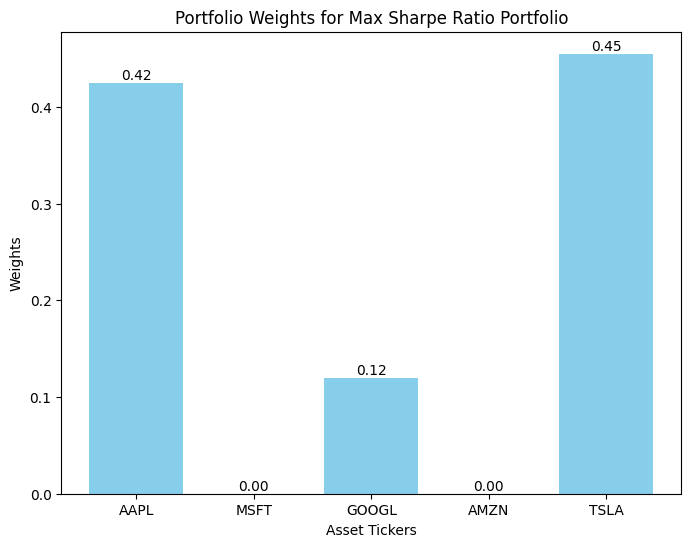

In [ ]:
 plot_weights(max_sharpe_weights, 'Portfolio Weights for Max Sharpe Ratio Portfolio')

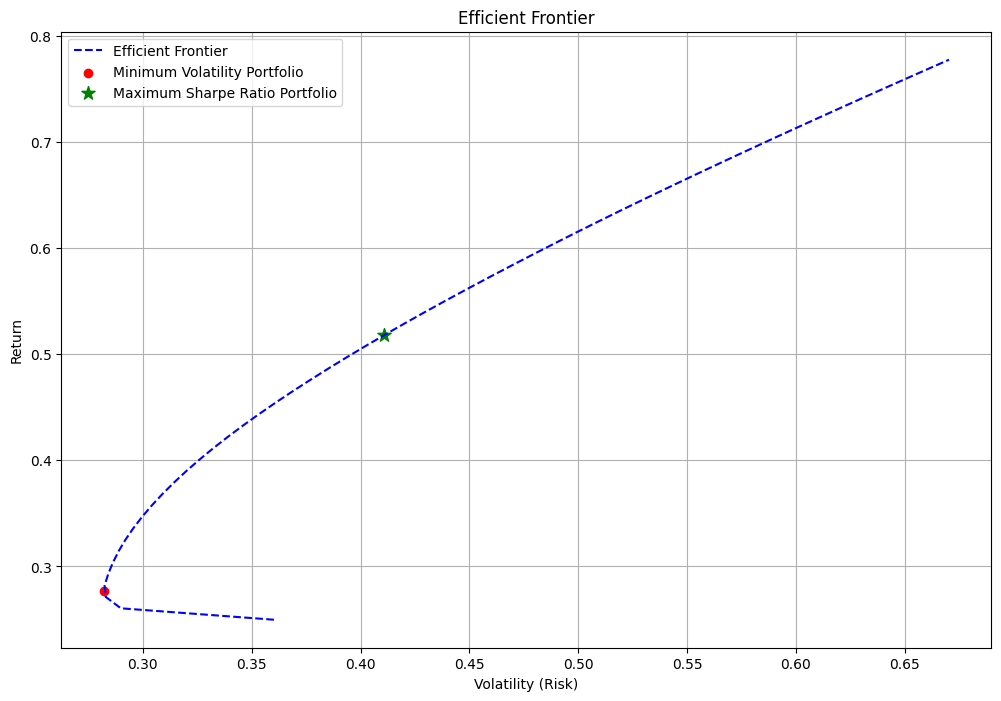

In [ ]:
# Plot the efficient frontier
target_returns = np.linspace(expected_returns.min(), expected_returns.max(), 50)
efficient_volatility = []

initial_weights = np.array([1. / num_assets] * num_assets)  # Initial equal weights

for target_return in target_returns:
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, expected_returns) - target_return},
    )
    bounds = tuple((0, 1) for _ in range(num_assets))  # No short selling
    result = minimize(min_volatility, initial_weights, bounds=bounds, constraints=constraints)
    efficient_volatility.append(result.fun)


plt.figure(figsize=(12, 8))
plt.plot(efficient_volatility, target_returns, 'b--', label='Efficient Frontier')
plt.scatter(min_vol_volatility, min_vol_return, c='red', marker='o', label='Minimum Volatility Portfolio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='green', marker='*', s=100, label='Maximum Sharpe Ratio Portfolio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(min_vol_volatility,min_vol_return)

0.2819647749824065 0.2750808411346861


In [ ]:
# Find and print the minimum volatility
min_efficient_volatility = min(efficient_volatility)
print("Minimum Volatility on the Efficient Frontier:", min_efficient_volatility)


Minimum Volatility on the Efficient Frontier: 0.28258631728218575
